### libs and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
import yfinance as yf

tk = yf.Tickers(['^IXIC','^GSPC'])
df = tk.history(period="max", interval="1h", auto_adjust=False)

print(f"{df.shape = }")
print(df.head().to_string())

[*********************100%***********************]  2 of 2 completed

df.shape = (3480, 16)
Price                        Adj Close                      Close               Dividends               High                        Low                       Open               Stock Splits           Volume           
Ticker                           ^GSPC         ^IXIC        ^GSPC         ^IXIC     ^GSPC ^IXIC        ^GSPC         ^IXIC        ^GSPC         ^IXIC        ^GSPC         ^IXIC        ^GSPC ^IXIC      ^GSPC      ^IXIC
Datetime                                                                                                                                                                                                                 
2023-11-03 13:30:00+00:00  4348.879883  13387.814453  4348.879883  13387.814453       0.0   0.0  4364.470215  13453.605469  4334.229980  13344.727539  4334.229980  13356.633789          0.0   0.0          0          0
2023-11-03 14:30:00+00:00  4350.439941  13415.411133  4350.439941  13415.411133       0.0   0.0  4353.8701

In [3]:
ndq_bars = df.xs('^IXIC', level=1, axis=1)
ndq_bars.columns = [c.lower().replace(' ', '_') for c in ndq_bars.columns]
print(ndq_bars.shape)
print(ndq_bars.head().to_string())

(3480, 8)
                              adj_close         close  dividends          high           low          open  stock_splits     volume
Datetime                                                                                                                           
2023-11-03 13:30:00+00:00  13387.814453  13387.814453        0.0  13453.605469  13344.727539  13356.633789           0.0          0
2023-11-03 14:30:00+00:00  13415.411133  13415.411133        0.0  13429.234375  13381.748047  13387.870117           0.0  573567000
2023-11-03 15:30:00+00:00  13482.062500  13482.062500        0.0  13485.667969  13414.269531  13415.856445           0.0  430968000
2023-11-03 16:30:00+00:00  13466.087891  13466.087891        0.0  13490.438477  13458.376953  13480.580078           0.0  389079000
2023-11-03 17:30:00+00:00  13499.580078  13499.580078        0.0  13499.580078  13460.573242  13465.966797           0.0  392983000


In [4]:
snp_bars = df.xs('^GSPC', level=1, axis=1)
snp_bars.columns = [c.lower().replace(' ', '_') for c in snp_bars.columns]
print(snp_bars.shape)
print(snp_bars.head().to_string())

(3480, 8)
                             adj_close        close  dividends         high          low         open  stock_splits     volume
Datetime                                                                                                                      
2023-11-03 13:30:00+00:00  4348.879883  4348.879883        0.0  4364.470215  4334.229980  4334.229980           0.0          0
2023-11-03 14:30:00+00:00  4350.439941  4350.439941        0.0  4353.870117  4343.589844  4349.069824           0.0  341329357
2023-11-03 15:30:00+00:00  4366.430176  4366.430176        0.0  4367.680176  4350.430176  4350.430176           0.0  262916330
2023-11-03 16:30:00+00:00  4361.390137  4361.390137        0.0  4369.540039  4359.350098  4366.350098           0.0  230716000
2023-11-03 17:30:00+00:00  4368.049805  4368.049805        0.0  4369.020020  4360.370117  4361.379883           0.0  224414000


In [5]:
import pandas_datareader.data as web
import datetime

start = snp_bars.index.min().date() - datetime.timedelta(days=365/2)
end = snp_bars.index.max().date()

econs = web.DataReader(['GDP','UNRATE','CPIAUCSL','FEDFUNDS'], 'fred', start, end)
print(econs.shape)
print(econs.head().to_string())

(28, 4)
                  GDP  UNRATE  CPIAUCSL  FEDFUNDS
DATE                                             
2023-06-01        NaN     3.6   304.099      5.08
2023-07-01  28074.846     3.5   304.615      5.12
2023-08-01        NaN     3.7   306.138      5.33
2023-09-01        NaN     3.8   307.374      5.33
2023-10-01  28424.722     3.9   307.653      5.33


### time series operations

In [6]:
snp_bars.index

DatetimeIndex(['2023-11-03 13:30:00+00:00', '2023-11-03 14:30:00+00:00',
               '2023-11-03 15:30:00+00:00', '2023-11-03 16:30:00+00:00',
               '2023-11-03 17:30:00+00:00', '2023-11-03 18:30:00+00:00',
               '2023-11-03 19:30:00+00:00', '2023-11-06 14:30:00+00:00',
               '2023-11-06 15:30:00+00:00', '2023-11-06 16:30:00+00:00',
               ...
               '2025-10-30 17:30:00+00:00', '2025-10-30 18:30:00+00:00',
               '2025-10-30 19:30:00+00:00', '2025-10-31 13:30:00+00:00',
               '2025-10-31 14:30:00+00:00', '2025-10-31 15:30:00+00:00',
               '2025-10-31 16:30:00+00:00', '2025-10-31 17:30:00+00:00',
               '2025-10-31 18:30:00+00:00', '2025-10-31 19:30:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Datetime', length=3480, freq=None)

In [7]:
print(snp_bars.head().to_string())

                             adj_close        close  dividends         high          low         open  stock_splits     volume
Datetime                                                                                                                      
2023-11-03 13:30:00+00:00  4348.879883  4348.879883        0.0  4364.470215  4334.229980  4334.229980           0.0          0
2023-11-03 14:30:00+00:00  4350.439941  4350.439941        0.0  4353.870117  4343.589844  4349.069824           0.0  341329357
2023-11-03 15:30:00+00:00  4366.430176  4366.430176        0.0  4367.680176  4350.430176  4350.430176           0.0  262916330
2023-11-03 16:30:00+00:00  4361.390137  4361.390137        0.0  4369.540039  4359.350098  4366.350098           0.0  230716000
2023-11-03 17:30:00+00:00  4368.049805  4368.049805        0.0  4369.020020  4360.370117  4361.379883           0.0  224414000


In [8]:
snp_bars.loc['2024-12-31']

,adj_close,close,dividends,high,low,open,stock_splits,volume
Datetime,,,,,,,,
2024-12-31 14:30:00+00:00,5919.759766,5919.759766,0.0,5929.740234,5906.509766,5919.740234,0.0,0
2024-12-31 15:30:00+00:00,5893.379883,5893.379883,0.0,5923.580078,5892.560059,5919.930176,0.0,177522273
2024-12-31 16:30:00+00:00,5882.390137,5882.390137,0.0,5901.810059,5882.100098,5893.259766,0.0,151111987
2024-12-31 17:30:00+00:00,5874.430176,5874.430176,0.0,5899.540039,5872.629883,5882.439941,0.0,159255555
2024-12-31 18:30:00+00:00,5873.419922,5873.419922,0.0,5888.689941,5870.450195,5874.419922,0.0,140728702
2024-12-31 19:30:00+00:00,5895.660156,5895.660156,0.0,5895.839844,5868.859863,5873.419922,0.0,173582635
2024-12-31 20:30:00+00:00,5884.009766,5884.009766,0.0,5897.870117,5872.990234,5895.660156,0.0,297996000


In [9]:
snp_bars.at_time(datetime.time(14,30)).head(10)

,adj_close,close,dividends,high,low,open,stock_splits,volume
Datetime,,,,,,,,
2023-11-03 14:30:00+00:00,4350.439941,4350.439941,0.0,4353.870117,4343.589844,4349.069824,0.0,341329357
2023-11-06 14:30:00+00:00,4363.479980,4363.479980,0.0,4372.209961,4358.399902,4364.270020,0.0,0
2023-11-07 14:30:00+00:00,4375.180176,4375.180176,0.0,4375.180176,4355.410156,4366.209961,0.0,0
2023-11-08 14:30:00+00:00,4379.649902,4379.649902,0.0,4391.200195,4377.830078,4384.370117,0.0,0
2023-11-09 14:30:00+00:00,4374.209961,4374.209961,0.0,4393.399902,4373.470215,4391.410156,0.0,0
2023-11-10 14:30:00+00:00,4357.029785,4357.029785,0.0,4370.160156,4355.259766,4364.149902,0.0,400512868
2023-11-13 14:30:00+00:00,4400.970215,4400.970215,0.0,4406.660156,4393.819824,4406.660156,0.0,0
2023-11-14 14:30:00+00:00,4496.379883,4496.379883,0.0,4496.700195,4458.970215,4458.970215,0.0,0
2023-11-15 14:30:00+00:00,4514.660156,4514.660156,0.0,4519.560059,4501.609863,4505.299805,0.0,0


In [10]:
snp_bars.close['2025-10-31']

Datetime
2025-10-31 13:30:00+00:00    6853.950195
2025-10-31 14:30:00+00:00    6859.359863
2025-10-31 15:30:00+00:00    6838.930176
2025-10-31 16:30:00+00:00    6819.569824
2025-10-31 17:30:00+00:00    6844.779785
2025-10-31 18:30:00+00:00    6862.609863
2025-10-31 19:30:00+00:00    6840.229980
Name: close, dtype: float64

In [11]:
snp_bars.close

Datetime
2023-11-03 13:30:00+00:00    4348.879883
2023-11-03 14:30:00+00:00    4350.439941
2023-11-03 15:30:00+00:00    4366.430176
2023-11-03 16:30:00+00:00    4361.390137
2023-11-03 17:30:00+00:00    4368.049805
                                ...     
2025-10-31 15:30:00+00:00    6838.930176
2025-10-31 16:30:00+00:00    6819.569824
2025-10-31 17:30:00+00:00    6844.779785
2025-10-31 18:30:00+00:00    6862.609863
2025-10-31 19:30:00+00:00    6840.229980
Name: close, Length: 3480, dtype: float64

In [12]:
mth_mean = snp_bars.close.resample('ME').agg(['mean', 'median', 'std'])
mth_mean

,mean,median,std
Datetime,,,
2023-11-30 00:00:00+00:00,4475.104413,4506.759766,79.358441
2023-12-31 00:00:00+00:00,4683.014941,4714.909912,83.876101
2024-01-31 00:00:00+00:00,4801.462313,4779.220215,72.523352
2024-02-29 00:00:00+00:00,5007.517446,5002.734863,58.464198
2024-03-31 00:00:00+00:00,5170.335864,5160.114990,51.163925
2024-04-30 00:00:00+00:00,5117.753453,5112.255127,80.098633
2024-05-31 00:00:00+00:00,5232.712735,5243.800049,81.844277
2024-06-30 00:00:00+00:00,5412.184504,5432.810059,70.574003
2024-07-31 00:00:00+00:00,5541.161722,5552.430176,67.447936


<Axes: xlabel='Datetime'>

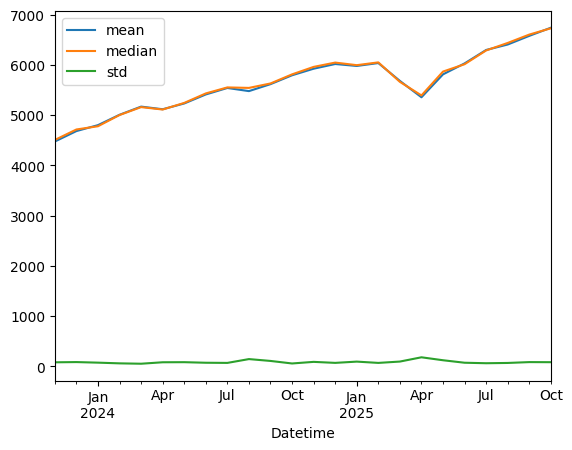

In [13]:
mth_mean.plot()

Text(0.5, 1.0, 'S&P 500 Monthly Close Price Mean and Median with Standard Deviation Bands')

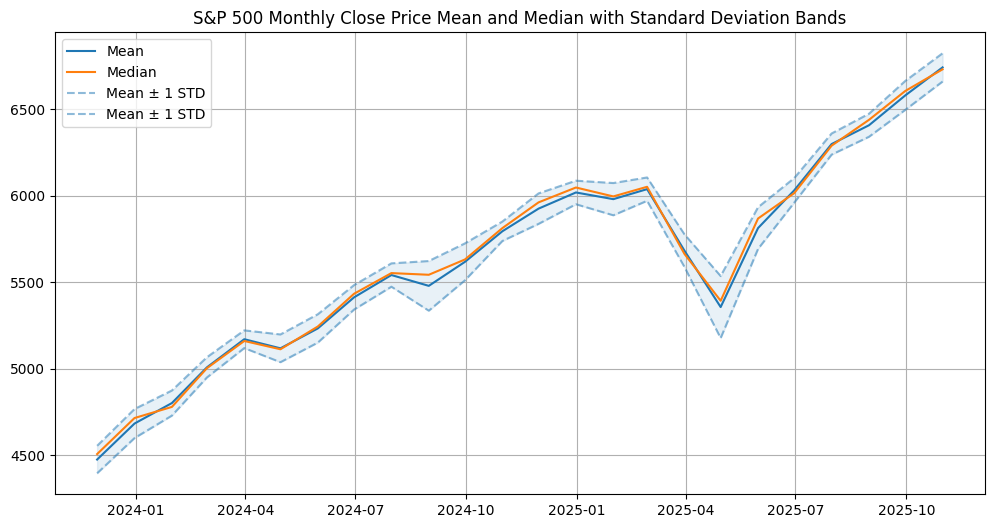

In [14]:
mth_mean['mean_upper'] = mth_mean['mean'] + mth_mean['std']
mth_mean['mean_lower'] = mth_mean['mean'] - mth_mean['std']
mth_mean['median_upper'] = mth_mean['median'] + mth_mean['std']
mth_mean['median_lower'] = mth_mean['median'] - mth_mean['std']

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.plot(mth_mean.index, mth_mean[['mean','median']], label=['Mean','Median'])
ax.plot(mth_mean.index, mth_mean[['mean_upper','mean_lower']], linestyle='--', color='C0', alpha=0.5, label='Mean ± 1 STD')
ax.fill_between(mth_mean.index, mth_mean['mean_lower'], mth_mean['mean_upper'], color='C0', alpha=0.1)

ax.legend()
ax.grid()
ax.set_title('S&P 500 Monthly Close Price Mean and Median with Standard Deviation Bands')

In [15]:
close = snp_bars.close
close / close.shift(1) - 1

Datetime
2023-11-03 13:30:00+00:00         NaN
2023-11-03 14:30:00+00:00    0.000359
2023-11-03 15:30:00+00:00    0.003676
2023-11-03 16:30:00+00:00   -0.001154
2023-11-03 17:30:00+00:00    0.001527
                               ...   
2025-10-31 15:30:00+00:00   -0.002978
2025-10-31 16:30:00+00:00   -0.002831
2025-10-31 17:30:00+00:00    0.003697
2025-10-31 18:30:00+00:00    0.002605
2025-10-31 19:30:00+00:00   -0.003261
Name: close, Length: 3480, dtype: float64

In [16]:
close.shift(1).head()

Datetime
2023-11-03 13:30:00+00:00            NaN
2023-11-03 14:30:00+00:00    4348.879883
2023-11-03 15:30:00+00:00    4350.439941
2023-11-03 16:30:00+00:00    4366.430176
2023-11-03 17:30:00+00:00    4361.390137
Name: close, dtype: float64

<Axes: xlabel='Datetime'>

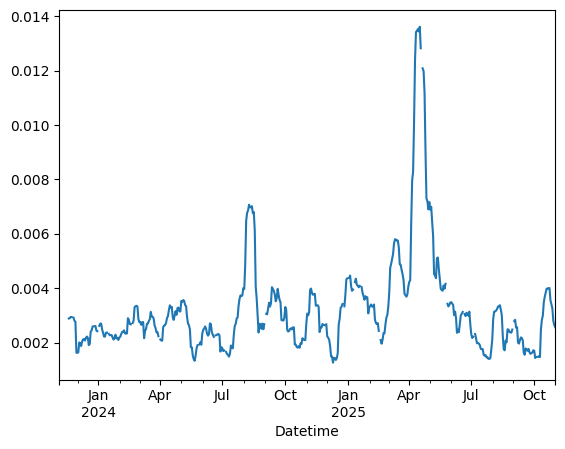

In [17]:
hourly_returns = snp_bars.close.pct_change()
std_10day = hourly_returns.rolling(window=10*7).std()
std_10day.resample('B').last().plot()

### data alignment

In [18]:
ts1 = snp_bars.close.head(10)
ts1

Datetime
2023-11-03 13:30:00+00:00    4348.879883
2023-11-03 14:30:00+00:00    4350.439941
2023-11-03 15:30:00+00:00    4366.430176
2023-11-03 16:30:00+00:00    4361.390137
2023-11-03 17:30:00+00:00    4368.049805
2023-11-03 18:30:00+00:00    4365.399902
2023-11-03 19:30:00+00:00    4358.109863
2023-11-06 14:30:00+00:00    4363.479980
2023-11-06 15:30:00+00:00    4365.200195
2023-11-06 16:30:00+00:00    4361.180176
Name: close, dtype: float64

In [19]:
ts2 = ts1.sample(frac=0.9, random_state=42)
ts2

Datetime
2023-11-06 15:30:00+00:00    4365.200195
2023-11-03 14:30:00+00:00    4350.439941
2023-11-03 18:30:00+00:00    4365.399902
2023-11-03 13:30:00+00:00    4348.879883
2023-11-06 14:30:00+00:00    4363.479980
2023-11-03 15:30:00+00:00    4366.430176
2023-11-06 16:30:00+00:00    4361.180176
2023-11-03 17:30:00+00:00    4368.049805
2023-11-03 16:30:00+00:00    4361.390137
Name: close, dtype: float64

In [20]:
ts1 + ts2

Datetime
2023-11-03 13:30:00+00:00    8697.759766
2023-11-03 14:30:00+00:00    8700.879883
2023-11-03 15:30:00+00:00    8732.860352
2023-11-03 16:30:00+00:00    8722.780273
2023-11-03 17:30:00+00:00    8736.099609
2023-11-03 18:30:00+00:00    8730.799805
2023-11-03 19:30:00+00:00            NaN
2023-11-06 14:30:00+00:00    8726.959961
2023-11-06 15:30:00+00:00    8730.400391
2023-11-06 16:30:00+00:00    8722.360352
Name: close, dtype: float64

In [21]:
f1 = snp_bars.close.sample(frac=0.9, random_state=42)
f2 = ndq_bars.close.sample(frac=0.95, random_state=42)
    
both = pd.concat([f1, f2],axis=1, keys=['snp','ndq'])
both.head()

,snp,ndq
Datetime,,
2023-11-03 13:30:00+00:00,4348.879883,13387.814453
2023-11-03 14:30:00+00:00,NaN,13415.411133
2023-11-03 15:30:00+00:00,4366.430176,13482.062500
2023-11-03 16:30:00+00:00,4361.390137,13466.087891
2023-11-03 17:30:00+00:00,4368.049805,13499.580078


### missing data 

In [22]:
df = both.head(20).copy()
df['ndq'] = df['ndq'].sample(frac=0.9, random_state=42)
df

,snp,ndq
Datetime,,
2023-11-03 13:30:00+00:00,4348.879883,13387.814453
2023-11-03 14:30:00+00:00,NaN,13415.411133
2023-11-03 15:30:00+00:00,4366.430176,13482.062500
2023-11-03 16:30:00+00:00,4361.390137,13466.087891
2023-11-03 17:30:00+00:00,4368.049805,13499.580078
2023-11-03 18:30:00+00:00,4365.399902,13491.953125
2023-11-03 19:30:00+00:00,4358.109863,NaN
2023-11-06 14:30:00+00:00,4363.479980,13508.346680
2023-11-06 15:30:00+00:00,4365.200195,13518.308594


In [23]:
both.count()

snp    3132
ndq    3306
dtype: int64

In [24]:
df.mean(1)

Datetime
2023-11-03 13:30:00+00:00     8868.347168
2023-11-03 14:30:00+00:00    13415.411133
2023-11-03 15:30:00+00:00     8924.246338
2023-11-03 16:30:00+00:00     8913.739014
2023-11-03 17:30:00+00:00     8933.814941
2023-11-03 18:30:00+00:00     8928.676514
2023-11-03 19:30:00+00:00     4358.109863
2023-11-06 14:30:00+00:00     8935.913330
2023-11-06 15:30:00+00:00     8941.754395
2023-11-06 16:30:00+00:00     8929.519775
2023-11-06 17:30:00+00:00     8900.753662
2023-11-06 18:30:00+00:00     8910.275635
2023-11-06 19:30:00+00:00     8929.788574
2023-11-06 20:30:00+00:00     8944.014404
2023-11-07 14:30:00+00:00     4375.180176
2023-11-07 15:30:00+00:00     9016.257812
2023-11-07 16:30:00+00:00     8995.691895
2023-11-07 17:30:00+00:00     9017.143555
2023-11-07 18:30:00+00:00     9025.749268
2023-11-07 19:30:00+00:00     9023.174805
dtype: float64

In [25]:
df.dropna(how='all')

,snp,ndq
Datetime,,
2023-11-03 13:30:00+00:00,4348.879883,13387.814453
2023-11-03 14:30:00+00:00,NaN,13415.411133
2023-11-03 15:30:00+00:00,4366.430176,13482.062500
2023-11-03 16:30:00+00:00,4361.390137,13466.087891
2023-11-03 17:30:00+00:00,4368.049805,13499.580078
2023-11-03 18:30:00+00:00,4365.399902,13491.953125
2023-11-03 19:30:00+00:00,4358.109863,NaN
2023-11-06 14:30:00+00:00,4363.479980,13508.346680
2023-11-06 15:30:00+00:00,4365.200195,13518.308594


In [26]:
df.fillna(df.mean())

,snp,ndq
Datetime,,
2023-11-03 13:30:00+00:00,4348.879883,13387.814453
2023-11-03 14:30:00+00:00,4366.763698,13415.411133
2023-11-03 15:30:00+00:00,4366.430176,13482.062500
2023-11-03 16:30:00+00:00,4361.390137,13466.087891
2023-11-03 17:30:00+00:00,4368.049805,13499.580078
2023-11-03 18:30:00+00:00,4365.399902,13491.953125
2023-11-03 19:30:00+00:00,4358.109863,13525.439616
2023-11-06 14:30:00+00:00,4363.479980,13508.346680
2023-11-06 15:30:00+00:00,4365.200195,13518.308594


In [27]:
df.ffill()

,snp,ndq
Datetime,,
2023-11-03 13:30:00+00:00,4348.879883,13387.814453
2023-11-03 14:30:00+00:00,4348.879883,13415.411133
2023-11-03 15:30:00+00:00,4366.430176,13482.062500
2023-11-03 16:30:00+00:00,4361.390137,13466.087891
2023-11-03 17:30:00+00:00,4368.049805,13499.580078
2023-11-03 18:30:00+00:00,4365.399902,13491.953125
2023-11-03 19:30:00+00:00,4358.109863,13491.953125
2023-11-06 14:30:00+00:00,4363.479980,13508.346680
2023-11-06 15:30:00+00:00,4365.200195,13518.308594


In [28]:
df.asfreq('4h')

,snp,ndq
Datetime,,
2023-11-03 13:30:00+00:00,4348.879883,13387.814453
2023-11-03 17:30:00+00:00,4368.049805,13499.580078
2023-11-03 21:30:00+00:00,NaN,NaN
2023-11-04 01:30:00+00:00,NaN,NaN
2023-11-04 05:30:00+00:00,NaN,NaN
2023-11-04 09:30:00+00:00,NaN,NaN
2023-11-04 13:30:00+00:00,NaN,NaN
2023-11-04 17:30:00+00:00,NaN,NaN
2023-11-04 21:30:00+00:00,NaN,NaN


In [29]:
df.asfreq('4h').ffill(limit=2)

,snp,ndq
Datetime,,
2023-11-03 13:30:00+00:00,4348.879883,13387.814453
2023-11-03 17:30:00+00:00,4368.049805,13499.580078
2023-11-03 21:30:00+00:00,4368.049805,13499.580078
2023-11-04 01:30:00+00:00,4368.049805,13499.580078
2023-11-04 05:30:00+00:00,NaN,NaN
2023-11-04 09:30:00+00:00,NaN,NaN
2023-11-04 13:30:00+00:00,NaN,NaN
2023-11-04 17:30:00+00:00,NaN,NaN
2023-11-04 21:30:00+00:00,NaN,NaN


### groupby operations

In [30]:
Nfull = 2_000
def random_ascii_letters(size):
    return ''.join(np.random.choice(list('abcdefghijklmnopqrstuvwxyz'), size=size))

tickers = np.array(list(random_ascii_letters(5).upper() for _ in range(Nfull)), dtype='object')
tickers = np.unique(tickers)
Nfull = tickers.shape[0]

ind_names = np.array(['ENERGY','TECH','HEALTH','FINANCE','RETAIL','UTILITIES'], dtype='object')
industries = pd.Series(np.random.choice(ind_names, size=Nfull), index=tickers,name='industry')

ccys = np.array(['USD','EUR','JPY','GBP','AUD','CAD'], dtype='object')
ccy = pd.Series(np.random.choice(ccys, size=Nfull), index=tickers,name='currency')

In [31]:
N = 1000
df = pd.DataFrame({'momentum': np.random.randn(N)/200 + 0.03,
                   'value': np.random.randn(N)/200 + 0.08,
                   'short_interest': np.random.randn(N)/200 - 0.02,
                   }, index = np.random.choice(tickers, size=N, replace=False))
print(df.shape)
print(df.head().to_string())

(1000, 3)
       momentum     value  short_interest
YDWRO  0.031554  0.075472       -0.006902
QYBDC  0.033589  0.073075       -0.019980
ENPGI  0.031319  0.078915       -0.020048
WCSHR  0.032199  0.072085       -0.025225
WTBPA  0.034912  0.085644       -0.024681


In [32]:
means = df.groupby(industries).mean()
means

,momentum,value,short_interest
industry,,,
ENERGY,0.029886,0.079981,-0.019513
FINANCE,0.029248,0.080128,-0.019942
HEALTH,0.029692,0.079895,-0.019557
RETAIL,0.030289,0.079459,-0.019680
TECH,0.030330,0.080152,-0.020083
UTILITIES,0.029863,0.079838,-0.020888


In [49]:
ind_sub = industries.take(np.random.choice(range(len(industries)), size=10, replace=False))
means = df.groupby(ind_sub,dropna=False).mean()
means

,momentum,value,short_interest
industry,,,
ENERGY,0.025944,0.077390,-0.015721
FINANCE,0.025965,0.076665,-0.028262
HEALTH,0.029688,0.085907,-0.020439
TECH,0.028963,0.080959,-0.020316
NaN,0.029896,0.079905,-0.019958


<Axes: ylabel='industry'>

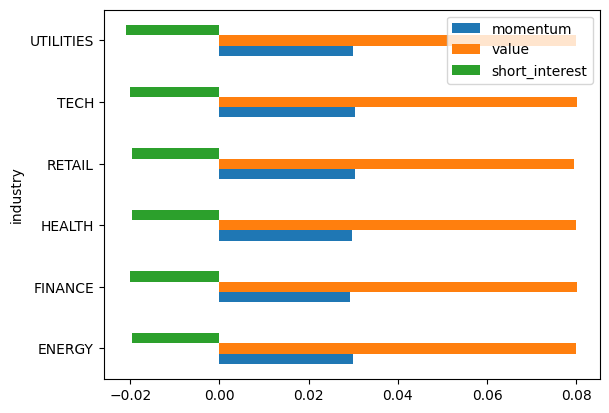

In [33]:
means.plot(kind='barh')

In [34]:
means = df.groupby([industries, ccy]).mean()
means

momentum     value  short_interest
industry  currency                                    
ENERGY    AUD       0.029788  0.078576       -0.019298
          CAD       0.030313  0.080935       -0.018991
          EUR       0.030313  0.080053       -0.019448
          GBP       0.030257  0.080374       -0.020611
          JPY       0.028817  0.079261       -0.019107
          USD       0.028986  0.080509       -0.019645
FINANCE   AUD       0.029947  0.082098       -0.018638
          CAD       0.028965  0.080095       -0.020266
          EUR       0.030372  0.080479       -0.019427
          GBP       0.028914  0.079347       -0.021187
          JPY       0.028036  0.080086       -0.019266
          USD       0.029546  0.078537       -0.021239
HEALTH    AUD       0.028267  0.079048       -0.019093
          CAD       0.030266  0.078808       -0.019887
          EUR       0.029256  0.079705       -0.018926
          GBP       0.031397  0.081356       -0.020239
          JPY       0.029841  0.080915       -0.019656
          USD       0.029528  0.078977       -0.019813
RETAIL    AUD       0.031241  0.080264       -0.019397
          CAD       0.031270  0.079089       -0.019518
          EUR       0.030018  0.079361       -0.020406
          GBP       0.029659  0.078847       -0.019429
          JPY       0.029119  0.079746       -0.020574
          USD       0.030680  0.079609       -0.018545
TECH      AUD       0.029256  0.079257       -0.020527
          CAD       0.031026  0.080049       -0.019654
          EUR       0.030995  0.080812       -0.019747
          GBP       0.031159  0.080746       -0.019704
          JPY       0.029527  0.079534       -0.020183
          USD       0.029678  0.080401       -0.020930
UTILITIES AUD       0.029109  0.079013       -0.020717
          CAD       0.029285  0.079955       -0.021548
          EUR       0.030903  0.081462       -0.019529
          GBP       0.030635  0.081013       -0.021433
          JPY       0.030254  0.079187       -0.021488
          USD       0.028870  0.078223       -0.020811

In [55]:
means = df.groupby([industries, ccy]).mean()
means

momentum     value  short_interest
industry  currency                                    
ENERGY    AUD       0.029788  0.078576       -0.019298
          CAD       0.030313  0.080935       -0.018991
          EUR       0.030313  0.080053       -0.019448
          GBP       0.030257  0.080374       -0.020611
          JPY       0.028817  0.079261       -0.019107
          USD       0.028986  0.080509       -0.019645
FINANCE   AUD       0.029947  0.082098       -0.018638
          CAD       0.028965  0.080095       -0.020266
          EUR       0.030372  0.080479       -0.019427
          GBP       0.028914  0.079347       -0.021187
          JPY       0.028036  0.080086       -0.019266
          USD       0.029546  0.078537       -0.021239
HEALTH    AUD       0.028267  0.079048       -0.019093
          CAD       0.030266  0.078808       -0.019887
          EUR       0.029256  0.079705       -0.018926
          GBP       0.031397  0.081356       -0.020239
          JPY       0.029841  0.080915       -0.019656
          USD       0.029528  0.078977       -0.019813
RETAIL    AUD       0.031241  0.080264       -0.019397
          CAD       0.031270  0.079089       -0.019518
          EUR       0.030018  0.079361       -0.020406
          GBP       0.029659  0.078847       -0.019429
          JPY       0.029119  0.079746       -0.020574
          USD       0.030680  0.079609       -0.018545
TECH      AUD       0.029256  0.079257       -0.020527
          CAD       0.031026  0.080049       -0.019654
          EUR       0.030995  0.080812       -0.019747
          GBP       0.031159  0.080746       -0.019704
          JPY       0.029527  0.079534       -0.020183
          USD       0.029678  0.080401       -0.020930
UTILITIES AUD       0.029109  0.079013       -0.020717
          CAD       0.029285  0.079955       -0.021548
          EUR       0.030903  0.081462       -0.019529
          GBP       0.030635  0.081013       -0.021433
          JPY       0.030254  0.079187       -0.021488
          USD       0.028870  0.078223       -0.020811

In [35]:
normed = df.groupby([industries, ccy], dropna=False, group_keys=False).apply(
    lambda x: (x - x.mean()) / x.std()
)
normed

,momentum,value,short_interest
YDWRO,0.251281,-0.824117,2.245742
QYBDC,0.902907,-1.570552,-0.080085
ENPGI,0.477713,-0.173837,0.307696
WCSHR,0.459793,-1.290838,-0.954192
WTBPA,1.008174,1.617793,-0.553782
...,...,...,...
FSBLR,-2.016251,-0.256428,-0.802482
EAGBM,-1.065344,-0.269483,0.981438
BJSQQ,0.295104,-1.329961,0.903626
SCFHH,-0.482912,1.381120,0.874173


In [36]:
normed.groupby([industries, ccy]).agg(['mean','std'])

momentum              value      short_interest     
                            mean  std          mean  std           mean  std
industry  currency                                                          
ENERGY    AUD       5.818391e-16  1.0  3.330669e-16  1.0  -1.356939e-16  1.0
          CAD       1.873501e-16  1.0 -6.106227e-16  1.0   4.666406e-16  1.0
          EUR      -1.110223e-16  1.0  2.442491e-16  1.0   6.106227e-16  1.0
          GBP       6.737905e-16  1.0 -1.508372e-15  1.0  -6.048801e-16  1.0
          JPY       1.074898e-15  1.0 -5.349256e-16  1.0   3.027881e-16  1.0
          USD       4.049049e-16  1.0 -3.330669e-16  1.0  -5.681730e-16  1.0
FINANCE   AUD       5.625460e-16  1.0 -2.426630e-15  1.0   3.687526e-16  1.0
          CAD      -4.730515e-16  1.0 -1.148839e-15  1.0  -2.172175e-16  1.0
          EUR      -1.243450e-16  1.0 -3.819167e-16  1.0   1.776357e-16  1.0
          GBP      -1.850372e-17  1.0  8.280413e-16  1.0  -4.163336e-17  1.0
          JPY       5.922550e-16  1.0  2.597595e-15  1.0   1.306145e-17  1.0
          USD       6.085667e-16  1.0 -4.235295e-16  1.0  -1.081439e-15  1.0
HEALTH    AUD      -2.498002e-16  1.0 -7.251144e-16  1.0  -1.491862e-16  1.0
          CAD       7.278129e-16  1.0  3.420104e-15  1.0  -1.079383e-16  1.0
          EUR       4.584147e-16  1.0  1.946472e-15  1.0   8.881784e-16  1.0
          GBP       1.189525e-16  1.0 -1.669300e-15  1.0   3.191891e-16  1.0
          JPY      -2.018587e-16  1.0  1.668699e-15  1.0   3.566171e-16  1.0
          USD      -6.661338e-16  1.0 -3.747003e-16  1.0  -7.401487e-17  1.0
RETAIL    AUD       9.223391e-16  1.0  9.564998e-16  1.0  -2.989062e-17  1.0
          CAD       7.879002e-17  1.0 -4.790075e-16  1.0  -2.139865e-16  1.0
          EUR       5.792468e-17  1.0  2.683843e-15  1.0   5.937280e-16  1.0
          GBP      -2.949030e-17  1.0 -6.852158e-16  1.0  -1.804112e-16  1.0
          JPY       1.205633e-16  1.0 -2.081668e-17  1.0  -2.498002e-16  1.0
          USD      -1.155641e-15  1.0 -1.301989e-15  1.0  -1.715799e-16  1.0
TECH      AUD      -4.440892e-16  1.0  1.320581e-15  1.0  -7.128800e-16  1.0
          CAD       6.768779e-16  1.0 -4.870656e-16  1.0  -2.578583e-16  1.0
          EUR      -1.586033e-17  1.0 -5.154607e-16  1.0  -5.590766e-16  1.0
          GBP       3.849641e-16  1.0  9.529414e-16  1.0  -7.517135e-18  1.0
          JPY       7.068420e-16  1.0 -2.324067e-15  1.0  -4.366877e-16  1.0
          USD       3.226586e-16  1.0  1.415534e-15  1.0   1.804112e-16  1.0
UTILITIES AUD       7.449238e-16  1.0 -1.117386e-15  1.0   1.539987e-16  1.0
          CAD       2.616220e-16  1.0 -1.570760e-15  1.0   5.427757e-16  1.0
          EUR       3.162453e-16  1.0  3.088439e-15  1.0  -3.885781e-16  1.0
          GBP      -3.095167e-16  1.0 -7.906134e-16  1.0  -4.956184e-16  1.0
          JPY       6.344132e-16  1.0  7.533656e-16  1.0   8.723181e-17  1.0
          USD       5.551115e-17  1.0  1.554312e-15  1.0  -4.683753e-16  1.0

### Hierarchical indexing

In [56]:
means

momentum     value  short_interest
industry  currency                                    
ENERGY    AUD       0.029788  0.078576       -0.019298
          CAD       0.030313  0.080935       -0.018991
          EUR       0.030313  0.080053       -0.019448
          GBP       0.030257  0.080374       -0.020611
          JPY       0.028817  0.079261       -0.019107
          USD       0.028986  0.080509       -0.019645
FINANCE   AUD       0.029947  0.082098       -0.018638
          CAD       0.028965  0.080095       -0.020266
          EUR       0.030372  0.080479       -0.019427
          GBP       0.028914  0.079347       -0.021187
          JPY       0.028036  0.080086       -0.019266
          USD       0.029546  0.078537       -0.021239
HEALTH    AUD       0.028267  0.079048       -0.019093
          CAD       0.030266  0.078808       -0.019887
          EUR       0.029256  0.079705       -0.018926
          GBP       0.031397  0.081356       -0.020239
          JPY       0.029841  0.080915       -0.019656
          USD       0.029528  0.078977       -0.019813
RETAIL    AUD       0.031241  0.080264       -0.019397
          CAD       0.031270  0.079089       -0.019518
          EUR       0.030018  0.079361       -0.020406
          GBP       0.029659  0.078847       -0.019429
          JPY       0.029119  0.079746       -0.020574
          USD       0.030680  0.079609       -0.018545
TECH      AUD       0.029256  0.079257       -0.020527
          CAD       0.031026  0.080049       -0.019654
          EUR       0.030995  0.080812       -0.019747
          GBP       0.031159  0.080746       -0.019704
          JPY       0.029527  0.079534       -0.020183
          USD       0.029678  0.080401       -0.020930
UTILITIES AUD       0.029109  0.079013       -0.020717
          CAD       0.029285  0.079955       -0.021548
          EUR       0.030903  0.081462       -0.019529
          GBP       0.030635  0.081013       -0.021433
          JPY       0.030254  0.079187       -0.021488
          USD       0.028870  0.078223       -0.020811

In [57]:
print(means.head().to_string())

                   momentum     value  short_interest
industry currency                                    
ENERGY   AUD       0.029788  0.078576       -0.019298
         CAD       0.030313  0.080935       -0.018991
         EUR       0.030313  0.080053       -0.019448
         GBP       0.030257  0.080374       -0.020611
         JPY       0.028817  0.079261       -0.019107


In [58]:
means['momentum']

industry   currency
ENERGY     AUD         0.029788
           CAD         0.030313
           EUR         0.030313
           GBP         0.030257
           JPY         0.028817
           USD         0.028986
FINANCE    AUD         0.029947
           CAD         0.028965
           EUR         0.030372
           GBP         0.028914
           JPY         0.028036
           USD         0.029546
HEALTH     AUD         0.028267
           CAD         0.030266
           EUR         0.029256
           GBP         0.031397
           JPY         0.029841
           USD         0.029528
RETAIL     AUD         0.031241
           CAD         0.031270
           EUR         0.030018
           GBP         0.029659
           JPY         0.029119
           USD         0.030680
TECH       AUD         0.029256
           CAD         0.031026
           EUR         0.030995
           GBP         0.031159
           JPY         0.029527
           USD         0.029678
UTILITIES  AUD      

In [60]:
means.xs('TECH')

,momentum,value,short_interest
currency,,,
AUD,0.029256,0.079257,-0.020527
CAD,0.031026,0.080049,-0.019654
EUR,0.030995,0.080812,-0.019747
GBP,0.031159,0.080746,-0.019704
JPY,0.029527,0.079534,-0.020183
USD,0.029678,0.080401,-0.020930


In [65]:
means.stack()

industry   currency                
ENERGY     AUD       momentum          0.029788
                     value             0.078576
                     short_interest   -0.019298
           CAD       momentum          0.030313
                     value             0.080935
                                         ...   
UTILITIES  JPY       value             0.079187
                     short_interest   -0.021488
           USD       momentum          0.028870
                     value             0.078223
                     short_interest   -0.020811
Length: 108, dtype: float64

In [67]:
means.stack().unstack('industry')

industry                   ENERGY   FINANCE    HEALTH    RETAIL      TECH  \
currency                                                                    
AUD      momentum        0.029788  0.029947  0.028267  0.031241  0.029256   
         value           0.078576  0.082098  0.079048  0.080264  0.079257   
         short_interest -0.019298 -0.018638 -0.019093 -0.019397 -0.020527   
CAD      momentum        0.030313  0.028965  0.030266  0.031270  0.031026   
         value           0.080935  0.080095  0.078808  0.079089  0.080049   
         short_interest -0.018991 -0.020266 -0.019887 -0.019518 -0.019654   
EUR      momentum        0.030313  0.030372  0.029256  0.030018  0.030995   
         value           0.080053  0.080479  0.079705  0.079361  0.080812   
         short_interest -0.019448 -0.019427 -0.018926 -0.020406 -0.019747   
GBP      momentum        0.030257  0.028914  0.031397  0.029659  0.031159   
         value           0.080374  0.079347  0.081356  0.078847  0.080746   
         short_interest -0.020611 -0.021187 -0.020239 -0.019429 -0.019704   
JPY      momentum        0.028817  0.028036  0.029841  0.029119  0.029527   
         value           0.079261  0.080086  0.080915  0.079746  0.079534   
         short_interest -0.019107 -0.019266 -0.019656 -0.020574 -0.020183   
USD      momentum        0.028986  0.029546  0.029528  0.030680  0.029678   
         value           0.080509  0.078537  0.078977  0.079609  0.080401   
         short_interest -0.019645 -0.021239 -0.019813 -0.018545 -0.020930   

industry                 UTILITIES  
currency                            
AUD      momentum         0.029109  
         value            0.079013  
         short_interest  -0.020717  
CAD      momentum         0.029285  
         value            0.079955  
         short_interest  -0.021548  
EUR      momentum         0.030903  
         value            0.081462  
         short_interest  -0.019529  
GBP      momentum         0.030635  
         value            0.081013  
         short_interest  -0.021433  
JPY      momentum         0.030254  
         value            0.079187  
         short_interest  -0.021488  
USD      momentum         0.028870  
         value            0.078223  
         short_interest  -0.020811

### merging and joining

In [96]:
df2 = df.copy()
df2['industry'] = industries
df2 = df2.reset_index(names=['ticker'])
df2.head()

,ticker,momentum,value,short_interest,industry
0,YDWRO,0.031554,0.075472,-0.006902,ENERGY
1,QYBDC,0.033589,0.073075,-0.019980,ENERGY
2,ENPGI,0.031319,0.078915,-0.020048,UTILITIES
3,WCSHR,0.032199,0.072085,-0.025225,TECH
4,WTBPA,0.034912,0.085644,-0.024681,UTILITIES


In [103]:
industry_info = df.groupby(industries, as_index=False)['momentum'].agg(**{'avg_momentum': 'mean', 'std_momentum': 'std'})
industry_info.head()

,industry,avg_momentum,std_momentum
0,ENERGY,0.029886,0.005388
1,FINANCE,0.029248,0.005075
2,HEALTH,0.029692,0.005117
3,RETAIL,0.030289,0.005335
4,TECH,0.030330,0.004986


In [102]:
ccy2 = ccy.rename_axis('ticker').reset_index()
ccy2.head()

,ticker,currency
0,AADYF,AUD
1,AAVIO,USD
2,AAWSH,JPY
3,ABCSX,EUR
4,ABDDK,USD


In [105]:
data = df2.merge(industry_info).merge(ccy2)
data

,ticker,momentum,value,short_interest,industry,avg_momentum,std_momentum,currency
0,YDWRO,0.031554,0.075472,-0.006902,ENERGY,0.029886,0.005388,EUR
1,QYBDC,0.033589,0.073075,-0.019980,ENERGY,0.029886,0.005388,USD
2,ENPGI,0.031319,0.078915,-0.020048,UTILITIES,0.029863,0.004923,CAD
3,WCSHR,0.032199,0.072085,-0.025225,TECH,0.030330,0.004986,JPY
4,WTBPA,0.034912,0.085644,-0.024681,UTILITIES,0.029863,0.004923,JPY
...,...,...,...,...,...,...,...,...
995,FSBLR,0.018257,0.076876,-0.025742,UTILITIES,0.029863,0.004923,USD
996,EAGBM,0.023412,0.078027,-0.013666,FINANCE,0.029248,0.005075,GBP
997,BJSQQ,0.030625,0.071633,-0.016222,UTILITIES,0.029863,0.004923,AUD
998,SCFHH,0.025740,0.084863,-0.015345,HEALTH,0.029692,0.005117,AUD


In [112]:
ind_counts = data.groupby('industry').size()
freq_inds = ind_counts.index[ind_counts >= 165]
freq_inds

Index(['ENERGY', 'HEALTH', 'RETAIL', 'UTILITIES'], dtype='object', name='industry')

In [119]:
highest_momentum = data.groupby('industry')['momentum'].mean()[freq_inds].sort_index()
highest_momentum

industry
ENERGY       0.029886
HEALTH       0.029692
RETAIL       0.030289
UTILITIES    0.029863
Name: momentum, dtype: float64

In [120]:
filtered = data[data['industry'].isin(highest_momentum.index)]
filtered.groupby(['industry','currency']).momentum.mean().unstack()

currency,AUD,CAD,EUR,GBP,JPY,USD
industry,,,,,,
ENERGY,0.029788,0.030313,0.030313,0.030257,0.028817,0.028986
HEALTH,0.028267,0.030266,0.029256,0.031397,0.029841,0.029528
RETAIL,0.031241,0.031270,0.030018,0.029659,0.029119,0.030680
UTILITIES,0.029109,0.029285,0.030903,0.030635,0.030254,0.028870


### pivot tables

In [121]:
print(data.head().to_string())

  ticker  momentum     value  short_interest   industry  avg_momentum  std_momentum currency
0  YDWRO  0.031554  0.075472       -0.006902     ENERGY      0.029886      0.005388      EUR
1  QYBDC  0.033589  0.073075       -0.019980     ENERGY      0.029886      0.005388      USD
2  ENPGI  0.031319  0.078915       -0.020048  UTILITIES      0.029863      0.004923      CAD
3  WCSHR  0.032199  0.072085       -0.025225       TECH      0.030330      0.004986      JPY
4  WTBPA  0.034912  0.085644       -0.024681  UTILITIES      0.029863      0.004923      JPY


In [124]:
data.pivot_table(index='industry',columns='currency',aggfunc='mean',values='momentum')

currency,AUD,CAD,EUR,GBP,JPY,USD
industry,,,,,,
ENERGY,0.029788,0.030313,0.030313,0.030257,0.028817,0.028986
FINANCE,0.029947,0.028965,0.030372,0.028914,0.028036,0.029546
HEALTH,0.028267,0.030266,0.029256,0.031397,0.029841,0.029528
RETAIL,0.031241,0.031270,0.030018,0.029659,0.029119,0.030680
TECH,0.029256,0.031026,0.030995,0.031159,0.029527,0.029678
UTILITIES,0.029109,0.029285,0.030903,0.030635,0.030254,0.028870


### summary, statistics

In [125]:
data.industry.value_counts()

industry
UTILITIES    184
ENERGY       167
RETAIL       166
HEALTH       166
FINANCE      161
TECH         156
Name: count, dtype: int64

In [126]:
data.currency.describe()

count     1000
unique       6
top        EUR
freq       180
Name: currency, dtype: object

In [127]:
by_currency = data.groupby('currency')['momentum'].describe()
by_currency

,count,mean,std,min,25%,50%,75%,max
currency,,,,,,,,
AUD,163.0,0.029557,0.004974,0.017310,0.026542,0.029489,0.032788,0.043249
CAD,162.0,0.030265,0.005269,0.015216,0.027054,0.029875,0.033761,0.041599
EUR,180.0,0.030316,0.005009,0.018211,0.027100,0.029891,0.033639,0.044483
GBP,170.0,0.030343,0.005132,0.014084,0.026898,0.029987,0.033909,0.043305
JPY,179.0,0.029255,0.005359,0.015784,0.025822,0.029060,0.033097,0.046937
USD,146.0,0.029522,0.005011,0.014894,0.026001,0.029688,0.032998,0.040658


In [ ]:
by_currency.unstack()t

       currency
count  AUD         163.000000
       CAD         162.000000
       EUR         180.000000
       GBP         170.000000
       JPY         179.000000
       USD         146.000000
mean   AUD           0.029557
       CAD           0.030265
       EUR           0.030316
       GBP           0.030343
       JPY           0.029255
       USD           0.029522
std    AUD           0.004974
       CAD           0.005269
       EUR           0.005009
       GBP           0.005132
       JPY           0.005359
       USD           0.005011
min    AUD           0.017310
       CAD           0.015216
       EUR           0.018211
       GBP           0.014084
       JPY           0.015784
       USD           0.014894
25%    AUD           0.026542
       CAD           0.027054
       EUR           0.027100
       GBP           0.026898
       JPY           0.025822
       USD           0.026001
50%    AUD           0.029489
       CAD           0.029875
       EUR           0.0